EDA for Smile on 60+ project at NSS.
Created by Chris Mulvey on 30 Nov 2020.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
smile = pd.read_csv('../data/SmileOn11.28.2020.csv', skiprows = 2, encoding = "ISO-8859-1")

C:\Users\sarei\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (32,36,53,59,88,89,127,141,144,156,157,158,159) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
smile

,CallReportNum,ReportVersion,LinkedToCallReportNum,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,CallerNum,PhoneWorkerNum,WasRealCall,WasHangup,...,SMILE ON 60+ Screening - Treatment Urgency,SMILE ON 60+ Screening - Untreated Decay,SMILE ON 60+ Site Information - Enroller ID,SMILE ON 60+ Site Information - Enroller Location,SMILE ON 60+ Treatment Plan - Action: Upload After Picture on Finish Tab,SMILE ON 60+ Treatment Plan - Is the treatment plan completed?,SMILE ON 60+ Treatment Plan - Was a treatment plan developed?,"SMILE ON 60+ Treatment Plan - Was the enrollee able to be restored to function (can chew) and ""social six"" esthetics (top front six teeth are present and disease free)",SMILE ON 60+ Verification of Eligibility - Transportation Arranged,SMILE ON 60+ Verification of Eligibility - Verification of Eligibility
0,81381827,SMILE ON 60+ Registration,NaN,11/25/2020 16:46,11/25/2020 16:48,2,3859874,136529,NaN,NaN,...,NaN,NaN,Matthew Walker Comprehensive Health Center Inc...,Provider Site,NaN,NaN,NaN,NaN,NaN,NaN
1,81379177,SMILE ON 60+ Registration,NaN,11/25/2020 15:40,11/25/2020 15:55,15,3859755,82341,NaN,NaN,...,NaN,NaN,NaN,Health Assist Office,NaN,NaN,NaN,NaN,NaN,NaN
2,81377435,SMILE ON 60+ Clinical,NaN,11/25/2020 15:02,11/25/2020 15:02,0,2518680,119506,NaN,NaN,...,NaN,NaN,Friends in Need Health Center - Kingsport,Provider Site,NaN,Yes,Yes,Yes,NaN,NaN
3,81375215,SMILE ON 60+ Clinical,NaN,11/25/2020 14:17,11/25/2020 14:17,0,3231923,143703,NaN,NaN,...,NaN,NaN,Christ Community Health Services- Frayser,Provider Site,NaN,NaN,NaN,NaN,NaN,NaN
4,81373934,SMILE ON 60+ Clinical,NaN,11/25/2020 13:50,11/25/2020 13:58,8,-1,135611,NaN,NaN,...,Urgent Care - within next week-pain or infection,Yes,Neighborhood Health - Lebanon,NaN,NaN,NaN,Yes,No,NaN,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40027,53192452,SMILE ON 60+ Registration,NaN,5/23/2018 14:11,5/23/2018 14:11,0,-1,60132,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40028,67915561,SMILE ON 60+ Registration,NaN,5/15/2018 9:06,5/15/2018 9:10,4,3239813,128174,NaN,NaN,...,NaN,NaN,Church Health Center - Memphis,Provider Site,NaN,NaN,NaN,NaN,NaN,NaN
40029,67251405,SMILE ON 60+ Clinical,NaN,5/10/2018 8:25,5/10/2018 8:26,1,2631417,131347,NaN,NaN,...,NaN,NaN,Friends in Need Health Center - Kingsport,Provider Site,Not available,No,Yes,Yes,NaN,NaN
40030,63063150,SMILE ON 60+ Clinical,NaN,5/1/2018 8:14,5/1/2018 8:24,10,-1,116749,NaN,NaN,...,NaN,NaN,Interfaith Dental Clinic - Nashville,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Taking the columns that are highlighted in the data dictionary and putting them in a new dataframe.

In [4]:
# initializing an empty dataframe and putting in one column to test.
smile_small = pd.DataFrame()
smile_small['ID'] = smile['CallerNum']

In [5]:
smile_small.head()

,ID
0,3859874
1,3859755
2,2518680
3,3231923
4,-1


In [6]:
smile_small['report_type'] = smile['ReportVersion']

In [7]:
smile_small['call_date'] = smile['CallDateAndTimeStart']

In [8]:
smile_small['last_screening'] = smile['SMILE ON 60+ Screening - Last Screening Date']

In [9]:
smile_small['care_provided'] = smile['SMILE ON 60+ Oral Care Encounter - What care was provided to the enrollee? (Select all that apply)']

In [10]:
smile_small['enroller_id'] = smile['SMILE ON 60+ Site Information - Enroller ID']

In [11]:
smile_small['plan_completed'] = smile['SMILE ON 60+ Treatment Plan - Is the treatment plan completed?']

In [12]:
smile_small['plan_developed'] = smile['SMILE ON 60+ Treatment Plan - Was a treatment plan developed?']

In [13]:
smile_small['function_restored'] = smile['SMILE ON 60+ Treatment Plan - Was the enrollee able to be restored to function (can chew) and "social six" esthetics (top front six teeth are present and disease free)']

In [14]:
smile_small.head()

,ID,report_type,call_date,last_screening,care_provided,enroller_id,plan_completed,plan_developed,function_restored
0,3859874,SMILE ON 60+ Registration,11/25/2020 16:46,NaN,NaN,Matthew Walker Comprehensive Health Center Inc...,NaN,NaN,NaN
1,3859755,SMILE ON 60+ Registration,11/25/2020 15:40,NaN,NaN,NaN,NaN,NaN,NaN
2,2518680,SMILE ON 60+ Clinical,11/25/2020 15:02,NaN,5650 - Add tooth to existing partial denture - 30,Friends in Need Health Center - Kingsport,Yes,Yes,Yes
3,3231923,SMILE ON 60+ Clinical,11/25/2020 14:17,NaN,No Code - Denture step Mandibular: may be used...,Christ Community Health Services- Frayser,NaN,NaN,NaN
4,-1,SMILE ON 60+ Clinical,11/25/2020 13:50,11/25/2020,NaN,Neighborhood Health - Lebanon,NaN,Yes,No


If each row is a separate call to the call center, there are a lot of calls that don't lead 

In [15]:
smile_small.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40032 entries, 0 to 40031
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 40032 non-null  int64 
 1   report_type        40032 non-null  object
 2   call_date          40032 non-null  object
 3   last_screening     14892 non-null  object
 4   care_provided      24849 non-null  object
 5   enroller_id        32801 non-null  object
 6   plan_completed     17535 non-null  object
 7   plan_developed     17028 non-null  object
 8   function_restored  14276 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.7+ MB


In [16]:
smile_small['call_date'] = pd.to_datetime(smile_small['call_date'])

In [17]:
smile_small.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40032 entries, 0 to 40031
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 40032 non-null  int64         
 1   report_type        40032 non-null  object        
 2   call_date          40032 non-null  datetime64[ns]
 3   last_screening     14892 non-null  object        
 4   care_provided      24849 non-null  object        
 5   enroller_id        32801 non-null  object        
 6   plan_completed     17535 non-null  object        
 7   plan_developed     17028 non-null  object        
 8   function_restored  14276 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 2.7+ MB


Counts of function restored to see how many rows were marked either yes or no.

In [18]:
smile_small['function_restored'].value_counts()

No     8127
Yes    6149
Name: function_restored, dtype: int64

Counts of plan completed to see how many were marked yes or no.

In [19]:
smile_small['plan_completed'].value_counts()

No     12431
Yes     5104
Name: plan_completed, dtype: int64

Counts of calls related to clinic using enroller id.

In [20]:
smile_small['enroller_id'].value_counts()

Interfaith Dental Clinic - Nashville                                                    5802
Interfaith Dental Clinic - Murfreesboro                                                 3706
Church Health Center - Memphis                                                          3581
Matthew Walker Comprehensive Health Center Inc. - Nashville                             2516
Interfaith Health Clinic of Knoxville - Knoxville                                       1822
Karis Dental Clinic - Cleveland                                                         1809
Friends in Need Health Center - Kingsport                                               1566
Healing Hands Health Center - Bristol                                                   1346
Keystone Dental Care Inc. - Johnson City                                                1032
Christ Community Health Services- Hickory Hill                                           986
Christ Community Health Services- Frayser                             

Counts of calls by individual id number.

In [21]:
smile_small['ID'].value_counts()

-1          70
 2441776    36
 2431132    31
 2416076    29
 2466994    28
            ..
 3825101     1
 3743280     1
 2653820     1
 3686036     1
 3821558     1
Name: ID, Length: 8708, dtype: int64

Turning value count of calls by ID into a dataframe.

In [22]:
call_count = smile_small['ID'].value_counts().rename_axis('ID').reset_index(name='counts')

In [23]:
call_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8708 entries, 0 to 8707
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ID      8708 non-null   int64
 1   counts  8708 non-null   int64
dtypes: int64(2)
memory usage: 136.2 KB


In [24]:
call_count.head()

,ID,counts
0,-1,70
1,2441776,36
2,2431132,31
3,2416076,29
4,2466994,28


Subsetting dataframe or values counts of calls to only keep ids that have one call.

In [25]:
calls = call_count[call_count['counts'] == 1]

In [26]:
calls

,ID,counts
6678,2635582,1
6679,3858757,1
6680,2452343,1
6681,2656466,1
6682,2929292,1
...,...,...
8703,3825101,1
8704,3743280,1
8705,2653820,1
8706,3686036,1


In [27]:
joined_calls = smile_small.merge(calls, right_on = 'ID', left_on = 'ID', how = 'inner')

In [28]:
joined_calls

,ID,report_type,call_date,last_screening,care_provided,enroller_id,plan_completed,plan_developed,function_restored,counts
0,3859874,SMILE ON 60+ Registration,2020-11-25 16:46:00,NaN,NaN,Matthew Walker Comprehensive Health Center Inc...,NaN,NaN,NaN,1
1,3859755,SMILE ON 60+ Registration,2020-11-25 15:40:00,NaN,NaN,NaN,NaN,NaN,NaN,1
2,3858757,SMILE ON 60+ Registration,2020-11-25 10:56:00,NaN,NaN,NaN,NaN,NaN,NaN,1
3,3859863,SMILE ON 60+ Registration,2020-11-24 16:40:00,NaN,NaN,Matthew Walker Comprehensive Health Center Inc...,NaN,NaN,NaN,1
4,3857317,SMILE ON 60+ Registration,2020-11-24 16:25:00,NaN,NaN,Interfaith Health Clinic of Knoxville - Knoxville,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...
2025,2385088,SMILE ON 60+ Registration,2018-08-01 11:19:00,NaN,NaN,NaN,NaN,NaN,NaN,1
2026,2385054,SMILE ON 60+ Registration,2018-08-01 11:08:00,NaN,NaN,Interfaith Dental Clinic - Nashville,NaN,NaN,NaN,1
2027,2385074,SMILE ON 60+ Registration,2018-08-01 10:48:00,NaN,NaN,NaN,NaN,NaN,NaN,1
2028,2384897,SMILE ON 60+ Registration,2018-08-01 09:42:00,NaN,NaN,Interfaith Dental Clinic - Murfreesboro,NaN,NaN,NaN,1


In [29]:
joined_calls['care_provided'].value_counts()

150 - Comprehensive Oral Evaluation -new or established patient - 30; 210 - Intraoral complete film series (14-22 periapical and posterior bitewing images) - 15; 1110 - Prophylaxis-adult - 45; 5225 - Partial denture - flexible base - maxillary - 60; 5226 - Partial denture - flexible base - mandible - 60    1
9995 - encounter conducted by a dentist  Teledentistry - synchronous; real-time encounter -; Tele0999 unspecified diagnostic procedure-  $50                                                                                                                                                                        1
1110 - Prophylaxis-adult - 45; 1206 - application of topical flouride varnish - 5                                                                                                                                                                                                                                   1
Name: care_provided, dtype: int64

In [30]:
smile_2441776 = smile_small[smile_small['ID'] == 2441776]

In [31]:
smile_2441776.sort_values(by = 'call_date')

,ID,report_type,call_date,last_screening,care_provided,enroller_id,plan_completed,plan_developed,function_restored
38749,2441776,SMILE ON 60+ Registration,2018-09-24 16:04:00,NaN,NaN,Interfaith Dental Clinic - Nashville,NaN,NaN,NaN
38748,2441776,SMILE ON 60+ Clinical,2018-09-24 16:12:00,NaN,NaN,Interfaith Dental Clinic - Nashville,NaN,NaN,NaN
38747,2441776,SMILE ON 60+ Clinical,2018-09-24 16:17:00,NaN,NaN,Interfaith Dental Clinic - Nashville,NaN,NaN,NaN
38724,2441776,SMILE ON 60+ Clinical,2018-09-25 12:55:00,9/25/2018,1110 - Prophylaxis-adult - 45; 1330 - Oral Hyg...,Interfaith Dental Clinic - Nashville,NaN,NaN,NaN
38703,2441776,SMILE ON 60+ Clinical,2018-09-25 14:35:00,NaN,NaN,Interfaith Dental Clinic - Nashville,NaN,NaN,NaN
38692,2441776,SMILE ON 60+ Clinical,2018-09-26 08:06:00,9/25/2018,NaN,Interfaith Dental Clinic - Nashville,NaN,NaN,NaN
37140,2441776,SMILE ON 60+ Clinical,2018-11-07 09:37:00,9/25/2018,2332 - Resin three surfaces - Anterior - 15,Interfaith Dental Clinic - Nashville,NaN,NaN,NaN
36270,2441776,SMILE ON 60+ Clinical,2018-12-03 10:23:00,9/25/2018,220 - Intraoral - Periapical First Film - 5; 2...,Interfaith Dental Clinic - Nashville,NaN,NaN,NaN
36141,2441776,SMILE ON 60+ Clinical,2018-12-05 10:27:00,9/25/2018,220 - Intraoral - Periapical First Film - 5; 2...,Interfaith Dental Clinic - Nashville,NaN,Yes,NaN
33805,2441776,SMILE ON 60+ Clinical,2019-02-18 10:39:00,9/25/2018,150 - Comprehensive Oral Evaluation -new or es...,Interfaith Dental Clinic - Nashville,NaN,NaN,NaN


In [32]:
smile_2441776

,ID,report_type,call_date,last_screening,care_provided,enroller_id,plan_completed,plan_developed,function_restored
685,2441776,SMILE ON 60+ Clinical,2020-11-05 14:46:00,9/25/2018,2331 - Resin two surfaces - Anterior - 15; 239...,Interfaith Dental Clinic - Nashville,No,Yes,No
1024,2441776,SMILE ON 60+ Clinical,2020-10-29 11:48:00,9/25/2018,No Code - Denture step Mandibular: may be used...,Interfaith Dental Clinic - Nashville,No,Yes,No
3353,2441776,SMILE ON 60+ Clinical,2020-09-14 11:42:00,9/25/2018,No Code - Denture step Mandibular: may be used...,Interfaith Dental Clinic - Nashville,No,Yes,No
3812,2441776,SMILE ON 60+ Clinical,2020-09-02 13:45:00,9/2/2020,NaN,Interfaith Dental Clinic - Nashville,NaN,Yes,NaN
3833,2441776,SMILE ON 60+ Clinical,2020-09-02 11:21:00,9/25/2018,220 - Intraoral - Periapical First Film - 5; 1...,Interfaith Dental Clinic - Nashville,No,Yes,No
5312,2441776,SMILE ON 60+ Clinical,2020-08-05 11:14:00,9/25/2018,220 - Intraoral - Periapical First Film - 5; 3...,Interfaith Dental Clinic - Nashville,No,Yes,Yes
5906,2441776,SMILE ON 60+ Clinical,2020-07-23 09:33:00,9/25/2018,5110 - Complete denture-maxillary - 60; 5226 -...,Interfaith Dental Clinic - Nashville,No,Yes,Yes
6439,2441776,SMILE ON 60+ Clinical,2020-07-13 09:30:00,9/25/2018,5850 - Denture tissue conditioning maxillary - 15,Interfaith Dental Clinic - Nashville,No,Yes,Yes
11473,2441776,SMILE ON 60+ Clinical,2020-02-27 08:30:00,9/25/2018,1110 - Prophylaxis-adult - 45; 1330 - Oral Hyg...,Interfaith Dental Clinic - Nashville,Yes,Yes,Yes
14542,2441776,SMILE ON 60+ Clinical,2020-01-16 14:39:00,9/25/2018,No Code - Denture step Mandibular: may be used...,Interfaith Dental Clinic - Nashville,No,Yes,Yes


Taking columns related to transportation and seeing what that looks like.

In [33]:
transport = pd.DataFrame()

In [34]:
transport['ID'] = smile['CallerNum']
transport['barriers'] = smile['SMILE ON 60+ Case Management Information - Transportation Barriers']
transport['provided'] = smile['SMILE ON 60+ Clinic Information - Was initial transportation assistance or referral provided?']
transport['arranged'] = smile['SMILE ON 60+ Verification of Eligibility - Transportation Arranged']

In [35]:
transport

,ID,barriers,provided,arranged
0,3859874,Cost; Availability - no car/access to transpor...,NaN,NaN
1,3859755,NaN,NaN,NaN
2,2518680,NaN,NaN,NaN
3,3231923,NaN,NaN,NaN
4,-1,NaN,NaN,NaN
...,...,...,...,...
40027,-1,NaN,NaN,NaN
40028,3239813,NaN,NaN,NaN
40029,2631417,NaN,NaN,NaN
40030,-1,NaN,NaN,NaN


In [36]:
transport['barriers'].value_counts()

Cost; Availability - no car/access to transportation    1235
Availability - no car/access to transportation          1028
Cost                                                     562
Name: barriers, dtype: int64

In [37]:
transport['provided'].value_counts()

No     3600
Yes     175
Name: provided, dtype: int64

In [38]:
transport['arranged'].value_counts()

No     5483
Yes     342
Name: arranged, dtype: int64

Seeing if there is any difference between clinical or registration

In [39]:
registration = smile_small[smile_small['report_type'] == 'SMILE ON 60+ Registration']

In [40]:
registration.head()

,ID,report_type,call_date,last_screening,care_provided,enroller_id,plan_completed,plan_developed,function_restored
0,3859874,SMILE ON 60+ Registration,2020-11-25 16:46:00,NaN,NaN,Matthew Walker Comprehensive Health Center Inc...,NaN,NaN,NaN
1,3859755,SMILE ON 60+ Registration,2020-11-25 15:40:00,NaN,NaN,NaN,NaN,NaN,NaN
8,3859184,SMILE ON 60+ Registration,2020-11-25 13:00:00,NaN,NaN,Neighborhood Health - Lebanon,NaN,NaN,NaN
10,3550392,SMILE ON 60+ Registration,2020-11-25 11:33:00,NaN,NaN,NaN,NaN,NaN,NaN
11,3858757,SMILE ON 60+ Registration,2020-11-25 10:56:00,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
registration.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12600 entries, 0 to 40028
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 12600 non-null  int64         
 1   report_type        12600 non-null  object        
 2   call_date          12600 non-null  datetime64[ns]
 3   last_screening     0 non-null      object        
 4   care_provided      0 non-null      object        
 5   enroller_id        5565 non-null   object        
 6   plan_completed     0 non-null      object        
 7   plan_developed     0 non-null      object        
 8   function_restored  0 non-null      object        
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 984.4+ KB


In [42]:
clinical = smile_small[smile_small['report_type'] == 'SMILE ON 60+ Clinical']

In [43]:
clinical.head()

,ID,report_type,call_date,last_screening,care_provided,enroller_id,plan_completed,plan_developed,function_restored
2,2518680,SMILE ON 60+ Clinical,2020-11-25 15:02:00,NaN,5650 - Add tooth to existing partial denture - 30,Friends in Need Health Center - Kingsport,Yes,Yes,Yes
3,3231923,SMILE ON 60+ Clinical,2020-11-25 14:17:00,NaN,No Code - Denture step Mandibular: may be used...,Christ Community Health Services- Frayser,NaN,NaN,NaN
4,-1,SMILE ON 60+ Clinical,2020-11-25 13:50:00,11/25/2020,NaN,Neighborhood Health - Lebanon,NaN,Yes,No
5,3605119,SMILE ON 60+ Clinical,2020-11-25 13:04:00,NaN,No Code - Denture step Mandibular: may be used...,Friends in Need Health Center - Kingsport,No,Yes,NaN
6,3859184,SMILE ON 60+ Clinical,2020-11-25 13:03:00,NaN,NaN,Neighborhood Health - Lebanon,NaN,NaN,NaN


In [44]:
clinical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27432 entries, 2 to 40031
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 27432 non-null  int64         
 1   report_type        27432 non-null  object        
 2   call_date          27432 non-null  datetime64[ns]
 3   last_screening     14892 non-null  object        
 4   care_provided      24849 non-null  object        
 5   enroller_id        27236 non-null  object        
 6   plan_completed     17535 non-null  object        
 7   plan_developed     17028 non-null  object        
 8   function_restored  14276 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 2.1+ MB


Trying to see if I can calculate registration to treatment plan completion times.

In [45]:
# smile_small = smile_small.sort_values(['ID', 'call_date'])
# treatment_time = pd.DataFrame()
# for id in smile_small:
#     smile_small.groupby('ID')
#     if id['report_type'] == 'SMILE ON 60+ Registration':
#         treatment_time.append(id)
#     elif id['plan_completed'] == 'Yes':
#         treatment_time.append(id)
#     smile_small['treatment_time'] = smile_small['call_date'] - smile_small['']

In [46]:
reg_date = pd.DataFrame()

In [47]:
# for row_index, row_values in smile_small.iterrows():
#     if row_values['report_type'] == 'SMILE ON 60+ Registration':
#         reg_date.append(row_values['ID'])
#         reg_date.append(row_values['call_date'])

In [48]:
reg_date = smile_small[smile_small['report_type'] == 'SMILE ON 60+ Registration']

In [49]:
reg_date.head()

,ID,report_type,call_date,last_screening,care_provided,enroller_id,plan_completed,plan_developed,function_restored
0,3859874,SMILE ON 60+ Registration,2020-11-25 16:46:00,NaN,NaN,Matthew Walker Comprehensive Health Center Inc...,NaN,NaN,NaN
1,3859755,SMILE ON 60+ Registration,2020-11-25 15:40:00,NaN,NaN,NaN,NaN,NaN,NaN
8,3859184,SMILE ON 60+ Registration,2020-11-25 13:00:00,NaN,NaN,Neighborhood Health - Lebanon,NaN,NaN,NaN
10,3550392,SMILE ON 60+ Registration,2020-11-25 11:33:00,NaN,NaN,NaN,NaN,NaN,NaN
11,3858757,SMILE ON 60+ Registration,2020-11-25 10:56:00,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
reg_date.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12600 entries, 0 to 40028
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 12600 non-null  int64         
 1   report_type        12600 non-null  object        
 2   call_date          12600 non-null  datetime64[ns]
 3   last_screening     0 non-null      object        
 4   care_provided      0 non-null      object        
 5   enroller_id        5565 non-null   object        
 6   plan_completed     0 non-null      object        
 7   plan_developed     0 non-null      object        
 8   function_restored  0 non-null      object        
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 984.4+ KB


In [52]:
smile_smaller = pd.DataFrame()

In [53]:
smile_smaller['ID'] = smile_small['ID']
smile_smaller['report_type'] = smile_small['report_type']
smile_smaller['enroller_id'] = smile_small['enroller_id']
smile_smaller['call_date'] = smile_small['call_date']
smile_smaller['plan_completed'] = smile_small['plan_completed']

In [54]:
smile_smaller.head()

,ID,report_type,enroller_id,call_date,plan_completed
0,3859874,SMILE ON 60+ Registration,Matthew Walker Comprehensive Health Center Inc...,2020-11-25 16:46:00,NaN
1,3859755,SMILE ON 60+ Registration,NaN,2020-11-25 15:40:00,NaN
2,2518680,SMILE ON 60+ Clinical,Friends in Need Health Center - Kingsport,2020-11-25 15:02:00,Yes
3,3231923,SMILE ON 60+ Clinical,Christ Community Health Services- Frayser,2020-11-25 14:17:00,NaN
4,-1,SMILE ON 60+ Clinical,Neighborhood Health - Lebanon,2020-11-25 13:50:00,NaN


In [55]:
# Dropping rows with -1 and -2 as ID.
smile_smaller = smile_smaller[smile_smaller['ID'] > 0]

In [56]:
smile_smaller.head()

,ID,report_type,enroller_id,call_date,plan_completed
0,3859874,SMILE ON 60+ Registration,Matthew Walker Comprehensive Health Center Inc...,2020-11-25 16:46:00,NaN
1,3859755,SMILE ON 60+ Registration,NaN,2020-11-25 15:40:00,NaN
2,2518680,SMILE ON 60+ Clinical,Friends in Need Health Center - Kingsport,2020-11-25 15:02:00,Yes
3,3231923,SMILE ON 60+ Clinical,Christ Community Health Services- Frayser,2020-11-25 14:17:00,NaN
5,3605119,SMILE ON 60+ Clinical,Friends in Need Health Center - Kingsport,2020-11-25 13:04:00,No


In [57]:
# Setting a multi index to smile_smaller.
smile_smaller.set_index(['ID', 'report_type'], inplace = True)

In [58]:
smile_smaller

,,enroller_id,call_date,plan_completed
ID,report_type,,,
3859874,SMILE ON 60+ Registration,Matthew Walker Comprehensive Health Center Inc...,2020-11-25 16:46:00,NaN
3859755,SMILE ON 60+ Registration,NaN,2020-11-25 15:40:00,NaN
2518680,SMILE ON 60+ Clinical,Friends in Need Health Center - Kingsport,2020-11-25 15:02:00,Yes
3231923,SMILE ON 60+ Clinical,Christ Community Health Services- Frayser,2020-11-25 14:17:00,NaN
3605119,SMILE ON 60+ Clinical,Friends in Need Health Center - Kingsport,2020-11-25 13:04:00,No
...,...,...,...,...
2385621,SMILE ON 60+ Clinical,Interfaith Dental Clinic - Murfreesboro,2018-08-01 08:00:00,NaN
2307186,SMILE ON 60+ Clinical,Interfaith Dental Clinic - Murfreesboro,2018-06-08 08:14:00,NaN
2631417,SMILE ON 60+ Clinical,Friends in Need Health Center - Kingsport,2018-05-31 08:27:00,No


In [59]:
# Selecting one ID to see what it looks like.
smile_smaller.loc[(2384106, ['SMILE ON 60+ Registration', 'SMILE ON 60+ Clinical']), 'call_date']

ID       report_type              
2384106  SMILE ON 60+ Clinical       2020-01-20 13:25:00
         SMILE ON 60+ Clinical       2019-12-16 10:35:00
         SMILE ON 60+ Clinical       2019-11-18 10:26:00
         SMILE ON 60+ Clinical       2019-10-21 08:35:00
         SMILE ON 60+ Clinical       2019-06-11 11:04:00
         SMILE ON 60+ Clinical       2019-03-26 10:55:00
         SMILE ON 60+ Clinical       2019-01-09 10:07:00
         SMILE ON 60+ Clinical       2018-12-17 15:12:00
         SMILE ON 60+ Clinical       2018-11-19 12:35:00
         SMILE ON 60+ Clinical       2018-10-30 17:09:00
         SMILE ON 60+ Clinical       2018-10-09 18:59:00
         SMILE ON 60+ Clinical       2018-08-07 10:53:00
         SMILE ON 60+ Registration   2018-08-01 13:22:00
         SMILE ON 60+ Clinical       2018-08-01 08:53:00
Name: call_date, dtype: datetime64[ns]

In [60]:
smile_smaller = smile_smaller.sort_index()

In [61]:
# Running this without the index being sorted gave me a performance warning.
test = smile_smaller.loc[(2384106, 'SMILE ON 60+ Registration'), 'call_date']

In [62]:
test

ID       report_type              
2384106  SMILE ON 60+ Registration   2018-08-01 13:22:00
Name: call_date, dtype: datetime64[ns]

In [63]:
smile_smaller.index.is_lexsorted()

True

In [64]:
smile_smaller

enroller_id  \
ID      report_type                                                                    
2061444 SMILE ON 60+ Clinical                         Church Health Center - Memphis   
2307186 SMILE ON 60+ Clinical                Interfaith Dental Clinic - Murfreesboro   
2384106 SMILE ON 60+ Clinical                Interfaith Dental Clinic - Murfreesboro   
        SMILE ON 60+ Clinical                Interfaith Dental Clinic - Murfreesboro   
        SMILE ON 60+ Clinical                Interfaith Dental Clinic - Murfreesboro   
...                                                                              ...   
3859831 SMILE ON 60+ Registration  Matthew Walker Comprehensive Health Center Inc...   
3859848 SMILE ON 60+ Registration  Matthew Walker Comprehensive Health Center Inc...   
3859856 SMILE ON 60+ Registration  Matthew Walker Comprehensive Health Center Inc...   
3859863 SMILE ON 60+ Registration  Matthew Walker Comprehensive Health Center Inc...   
3859874 SMILE ON 60+ Registration  Matthew Walker Comprehensive Health Center Inc...   

                                            call_date plan_completed  
ID      report_type                                                   
2061444 SMILE ON 60+ Clinical     2020-10-30 11:39:00            NaN  
2307186 SMILE ON 60+ Clinical     2018-06-08 08:14:00            NaN  
2384106 SMILE ON 60+ Clinical     2020-01-20 13:25:00            Yes  
        SMILE ON 60+ Clinical     2019-12-16 10:35:00             No  
        SMILE ON 60+ Clinical     2019-11-18 10:26:00             No  
...                                               ...            ...  
3859831 SMILE ON 60+ Registration 2020-11-18 16:22:00            NaN  
3859848 SMILE ON 60+ Registration 2020-11-18 16:28:00            NaN  
3859856 SMILE ON 60+ Registration 2020-11-23 16:36:00            NaN  
3859863 SMILE ON 60+ Registration 2020-11-24 16:40:00            NaN  
3859874 SMILE ON 60+ Registration 2020-11-25 16:46:00            NaN  

[39952 rows x 3 columns]

In [65]:
# This code takes the .loc of one index and subtracts the oldest date from the newest date in the index and
# returns a time delta. 
diff1 = smile_smaller.loc[(2384106, ['SMILE ON 60+ Registration', 'SMILE ON 60+ Clinical']),
                                          'call_date'].max() - smile_smaller.loc[(2384106,
                                                                                  ['SMILE ON 60+ Registration',
                                                                                   'SMILE ON 60+ Clinical']),
                                                                                 'call_date'].min()

In [66]:
diff2 = smile_smaller.loc[(2441776, ['SMILE ON 60+ Registration', 'SMILE ON 60+ Clinical']),
                                          'call_date'].max() - smile_smaller.loc[(2441776,
                                                                                  ['SMILE ON 60+ Registration',
                                                                                   'SMILE ON 60+ Clinical']),
                                                                                 'call_date'].min()

In [67]:
diff1

Timedelta('537 days 04:32:00')

In [68]:
diff2

Timedelta('772 days 22:42:00')

An attempt at making a function from the above time calculation.

In [69]:
# def time_calc(df):
#     for index in df:
#         diff = df.loc[(index, ['SMILE ON 60+ Registration', 'SMILE ON 60+ Clinical']), 'call_date'].max() - df.loc[(index, ['SMILE ON 60+ Registration', 'SMILE ON 60+ Clinical']), 'call_date'].min()
#     return diff

In [70]:
#difference = time_calc(smile_smaller)

After trying the function, I decided on a for loop, using iterrows. The i in the code instead of using an index number as above allows the index to change as the for loop runs.

In [71]:
diff = []
for i, row in smile_smaller.iterrows():
    diff.append(smile_smaller.loc[(i, ['SMILE ON 60+ Registration', 
                                      'SMILE ON 60+ Clinical']), 
                                 'call_date'].max() - smile_smaller.loc[(i, 
                                                                         ['SMILE ON 60+ Registration', 
                                                                          'SMILE ON 60+ Clinical']), 
                                                                        'call_date'].min())

In [72]:
diff

[Timedelta('0 days 00:00:00'),
 Timedelta('0 days 00:00:00'),
 Timedelta('537 days 04:32:00'),
 Timedelta('537 days 04:32:00'),
 Timedelta('537 days 04:32:00'),
 Timedelta('537 days 04:32:00'),
 Timedelta('537 days 04:32:00'),
 Timedelta('537 days 04:32:00'),
 Timedelta('537 days 04:32:00'),
 Timedelta('537 days 04:32:00'),
 Timedelta('537 days 04:32:00'),
 Timedelta('537 days 04:32:00'),
 Timedelta('537 days 04:32:00'),
 Timedelta('537 days 04:32:00'),
 Timedelta('537 days 04:32:00'),
 Timedelta('537 days 04:32:00'),
 Timedelta('714 days 02:23:00'),
 Timedelta('714 days 02:23:00'),
 Timedelta('714 days 02:23:00'),
 Timedelta('714 days 02:23:00'),
 Timedelta('714 days 02:23:00'),
 Timedelta('714 days 02:23:00'),
 Timedelta('714 days 02:23:00'),
 Timedelta('714 days 02:23:00'),
 Timedelta('714 days 02:23:00'),
 Timedelta('714 days 02:23:00'),
 Timedelta('120 days 01:59:00'),
 Timedelta('120 days 01:59:00'),
 Timedelta('120 days 01:59:00'),
 Timedelta('120 days 01:59:00'),
 Timedelta('12

In [73]:
smile_smaller['total_time'] = diff

In [74]:
smile_smaller.head(20)

enroller_id  \
ID      report_type                                                          
2061444 SMILE ON 60+ Clinical               Church Health Center - Memphis   
2307186 SMILE ON 60+ Clinical      Interfaith Dental Clinic - Murfreesboro   
2384106 SMILE ON 60+ Clinical      Interfaith Dental Clinic - Murfreesboro   
        SMILE ON 60+ Clinical      Interfaith Dental Clinic - Murfreesboro   
        SMILE ON 60+ Clinical      Interfaith Dental Clinic - Murfreesboro   
        SMILE ON 60+ Clinical      Interfaith Dental Clinic - Murfreesboro   
        SMILE ON 60+ Clinical      Interfaith Dental Clinic - Murfreesboro   
        SMILE ON 60+ Clinical      Interfaith Dental Clinic - Murfreesboro   
        SMILE ON 60+ Clinical      Interfaith Dental Clinic - Murfreesboro   
        SMILE ON 60+ Clinical      Interfaith Dental Clinic - Murfreesboro   
        SMILE ON 60+ Clinical      Interfaith Dental Clinic - Murfreesboro   
        SMILE ON 60+ Clinical      Interfaith Dental Clinic - Murfreesboro   
        SMILE ON 60+ Clinical      Interfaith Dental Clinic - Murfreesboro   
        SMILE ON 60+ Clinical                                          NaN   
        SMILE ON 60+ Clinical      Interfaith Dental Clinic - Murfreesboro   
        SMILE ON 60+ Registration  Interfaith Dental Clinic - Murfreesboro   
2384744 SMILE ON 60+ Clinical         Interfaith Dental Clinic - Nashville   
        SMILE ON 60+ Clinical         Interfaith Dental Clinic - Nashville   
        SMILE ON 60+ Clinical         Interfaith Dental Clinic - Nashville   
        SMILE ON 60+ Clinical         Interfaith Dental Clinic - Nashville   

                                            call_date plan_completed  \
ID      report_type                                                    
2061444 SMILE ON 60+ Clinical     2020-10-30 11:39:00            NaN   
2307186 SMILE ON 60+ Clinical     2018-06-08 08:14:00            NaN   
2384106 SMILE ON 60+ Clinical     2020-01-20 13:25:00            Yes   
        SMILE ON 60+ Clinical     2019-12-16 10:35:00             No   
        SMILE ON 60+ Clinical     2019-11-18 10:26:00             No   
        SMILE ON 60+ Clinical     2019-10-21 08:35:00            NaN   
        SMILE ON 60+ Clinical     2019-06-11 11:04:00            NaN   
        SMILE ON 60+ Clinical     2019-03-26 10:55:00            NaN   
        SMILE ON 60+ Clinical     2019-01-09 10:07:00            NaN   
        SMILE ON 60+ Clinical     2018-12-17 15:12:00            NaN   
        SMILE ON 60+ Clinical     2018-11-19 12:35:00            NaN   
        SMILE ON 60+ Clinical     2018-10-30 17:09:00            NaN   
        SMILE ON 60+ Clinical     2018-10-09 18:59:00            NaN   
        SMILE ON 60+ Clinical     2018-08-07 10:53:00            NaN   
        SMILE ON 60+ Clinical     2018-08-01 08:53:00            NaN   
        SMILE ON 60+ Registration 2018-08-01 13:22:00            NaN   
2384744 SMILE ON 60+ Clinical     2020-07-15 10:41:00            Yes   
        SMILE ON 60+ Clinical     2020-07-01 08:53:00             No   
        SMILE ON 60+ Clinical     2019-12-31 15:19:00            Yes   
        SMILE ON 60+ Clinical     2019-09-04 13:16:00            Yes   

                                         total_time  
ID      report_type                                  
2061444 SMILE ON 60+ Clinical       0 days 00:00:00  
2307186 SMILE ON 60+ Clinical       0 days 00:00:00  
2384106 SMILE ON 60+ Clinical     537 days 04:32:00  
        SMILE ON 60+ Clinical     537 days 04:32:00  
        SMILE ON 60+ Clinical     537 days 04:32:00  
        SMILE ON 60+ Clinical     537 days 04:32:00  
        SMILE ON 60+ Clinical     537 days 04:32:00  
        SMILE ON 60+ Clinical     537 days 04:32:00  
        SMILE ON 60+ Clinical     537 days 04:32:00  
        SMILE ON 60+ Clinical     537 days 04:32:00  
        SMILE ON 60+ Clinical     537 days 04:32:00  
        SMILE ON 60+ Clinical     537 days 04:32:00  
     

In [75]:
smile_smaller.to_csv('../data/smile_smaller.csv')

In [76]:
smile_smaller['total_time'].mean()

Timedelta('286 days 02:43:17.093512')

In [77]:
smile_smaller['total_time'].describe()

count                       39952
mean     286 days 02:43:17.093512
std      215 days 20:55:05.347978
min               0 days 00:00:00
25%             104 days 02:53:00
50%             258 days 21:31:00
75%             434 days 00:04:00
max             834 days 22:28:00
Name: total_time, dtype: object

Looking to see if the duplicate times in total_time are skewing the statistical information.

In [78]:
smile_smaller = smile_smaller.drop_duplicates(subset=['total_time'])

In [79]:
smile_smaller.head()

,,enroller_id,call_date,plan_completed,total_time
ID,report_type,,,,
2061444,SMILE ON 60+ Clinical,Church Health Center - Memphis,2020-10-30 11:39:00,NaN,0 days 00:00:00
2384106,SMILE ON 60+ Clinical,Interfaith Dental Clinic - Murfreesboro,2020-01-20 13:25:00,Yes,537 days 04:32:00
2384744,SMILE ON 60+ Clinical,Interfaith Dental Clinic - Nashville,2020-07-15 10:41:00,Yes,714 days 02:23:00
2384833,SMILE ON 60+ Clinical,Interfaith Dental Clinic - Nashville,2018-11-29 11:05:00,Yes,120 days 01:59:00
2384922,SMILE ON 60+ Clinical,NaN,2018-08-07 10:49:00,NaN,6 days 01:01:00


In [80]:
smile_smaller.mean()

total_time   234 days 02:17:19.563517
dtype: timedelta64[ns]

In [81]:
smile_smaller['total_time'].describe()

count                        6140
mean     234 days 02:17:19.563517
std      194 days 09:59:34.227985
min               0 days 00:00:00
25%              73 days 02:26:15
50%             192 days 09:47:00
75%             360 days 16:46:45
max             834 days 22:28:00
Name: total_time, dtype: object

In [82]:
smile_smaller.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 6140 entries, (2061444, 'SMILE ON 60+ Clinical') to (3858402, 'SMILE ON 60+ Clinical')
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype          
---  ------          --------------  -----          
 0   enroller_id     4952 non-null   object         
 1   call_date       6140 non-null   datetime64[ns] 
 2   plan_completed  3863 non-null   object         
 3   total_time      6140 non-null   timedelta64[ns]
dtypes: datetime64[ns](1), object(2), timedelta64[ns](1)
memory usage: 278.0+ KB


In [83]:
smile_smaller['total_time'] = smile_smaller['total_time'].dt.days

<ipython-input-83-bf2acd084a69>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smile_smaller['total_time'] = smile_smaller['total_time'].dt.days


It appears that having the addditional rows of numbers changed the statistical information. I also noticed that dropping the IDs that were -1 and -2 reduced the number of IDs by almost 2600.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002694714B850>]],
      dtype=object)

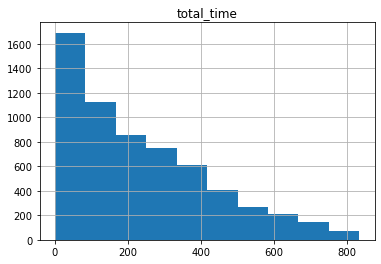

In [84]:
smile_smaller.hist(column = 'total_time')

In [87]:
smile_smaller.groupby('enroller_id').mean()

,total_time
enroller_id,
Appalachian Miles for Smiles - Mobile,76.914894
Christ Community Health Services- Broad Avenue,164.795775
Christ Community Health Services- Frayser,146.774648
Christ Community Health Services- Hickory Hill,159.798883
Christ Community Health Services- Raleigh,169.900000
Christ Community Health Services- Third Street,214.034483
Church Health Center - Memphis,206.870406
Fifty Forward - Nashville,137.000000
Friends in Need Health Center - Kingsport,370.559633
